In [5]:
#Post-1

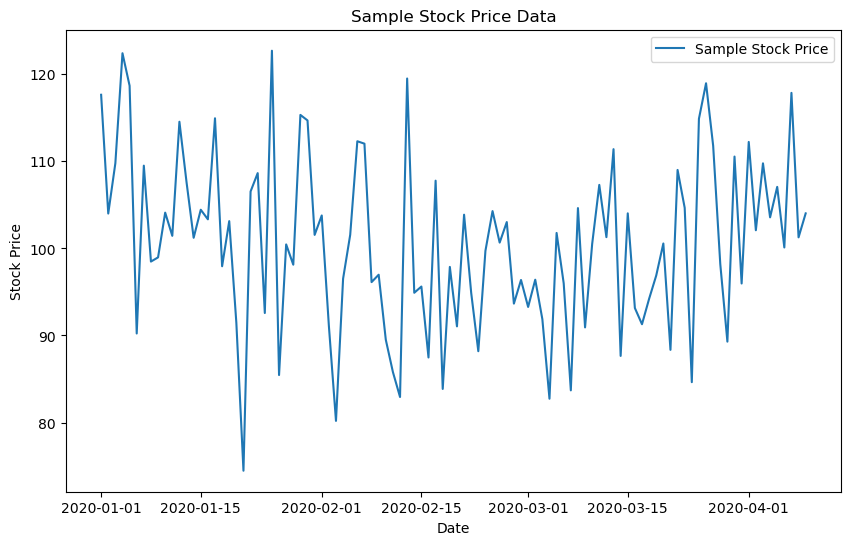

E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.3385
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1878
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0861
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0415
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0608
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0598
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0395
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0414
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0499
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0551
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Train RMSE: 10.919520882171412
Test RMSE: 11.852386930828104


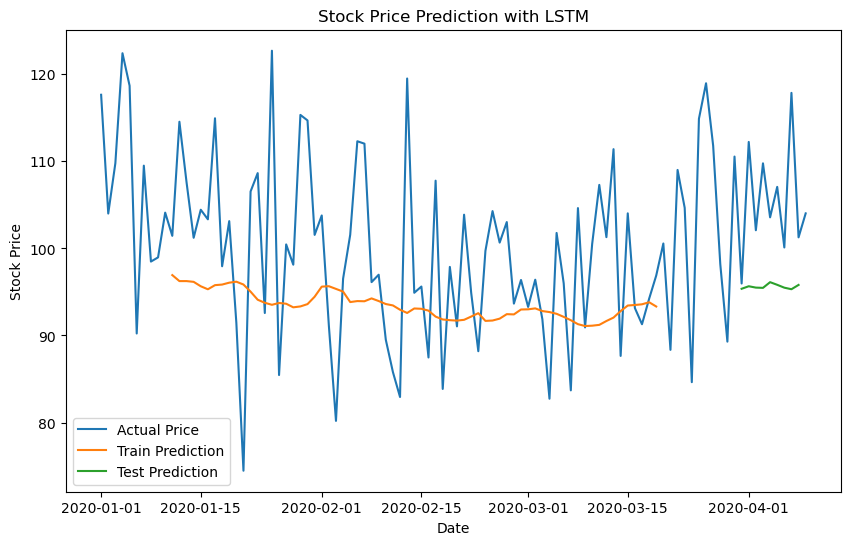

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import math

# Generate sample stock data
dates = pd.date_range(start='2020-01-01', periods=100, freq='D')
np.random.seed(0)
data = {
    'Date': dates,
    'Close': np.random.normal(loc=100, scale=10, size=len(dates))  # Sample closing prices
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Visualize the sample data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Sample Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Sample Stock Price Data')
plt.legend()
plt.show()

# Prepare the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into training and test data
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 10  # Adjusted for demo purposes
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

# Reshape input for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform actual values for comparison
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(y_train_actual, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, test_predict))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Plotting results
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_plot = np.empty_like(data)
test_plot[:, :] = np.nan
test_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(df.index, scaler.inverse_transform(scaled_data), label='Actual Price')
plt.plot(df.index, train_plot, label='Train Prediction')
plt.plot(df.index, test_plot, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.legend()
plt.show()


In [22]:
#Post-2

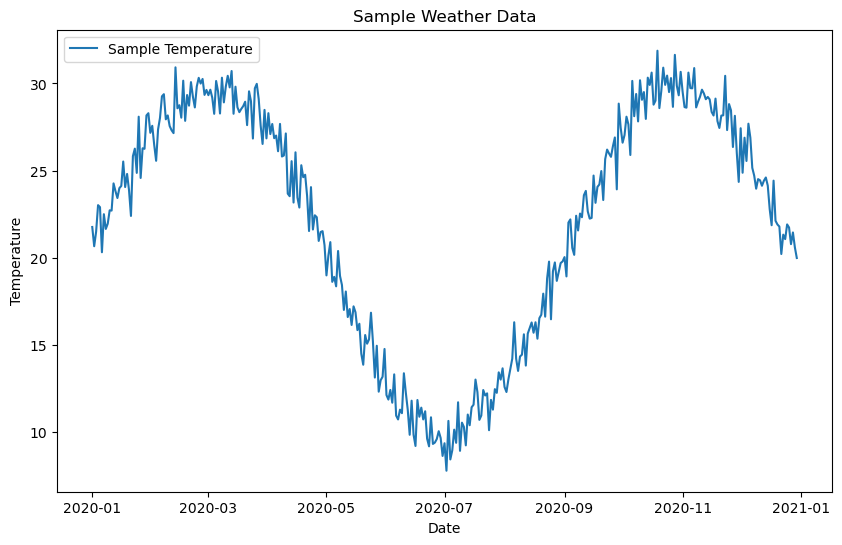

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Generate sample weather data
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=365, freq='D')
temperature = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(dates))) + np.random.normal(0, 1, len(dates))
data = {
    'ds': dates,
    'y': temperature
}
df = pd.DataFrame(data)

# Visualize the sample data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Sample Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Sample Weather Data')
plt.legend()
plt.show()


14:40:52 - cmdstanpy - INFO - Chain [1] start processing
14:40:53 - cmdstanpy - INFO - Chain [1] done processing
E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


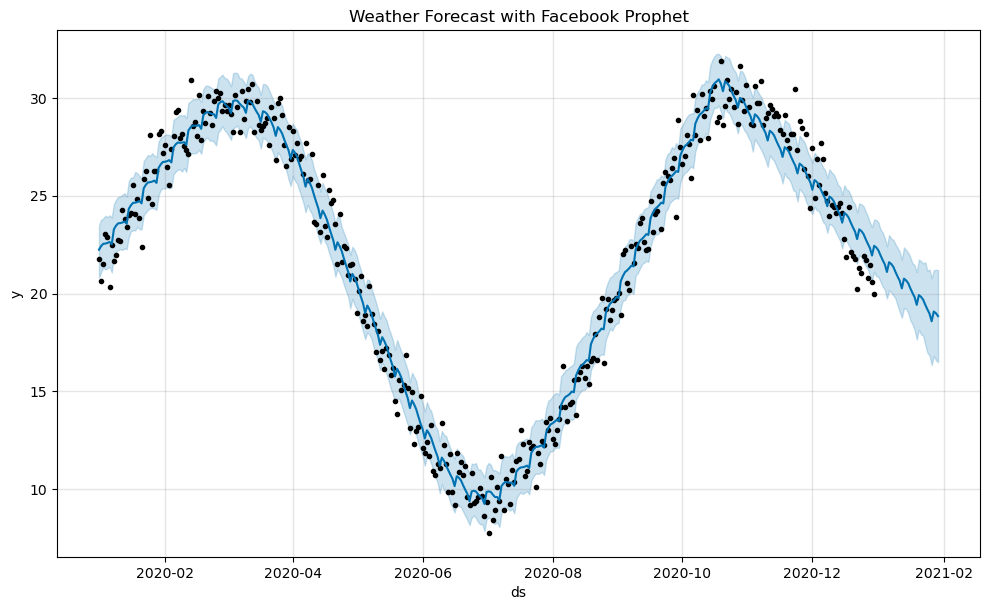

In [28]:
# Initialize the Prophet model
model = Prophet()

# Fit the model with the data
model.fit(df)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=30)  # Predicting 30 days into the future

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Weather Forecast with Facebook Prophet')
plt.show()


E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


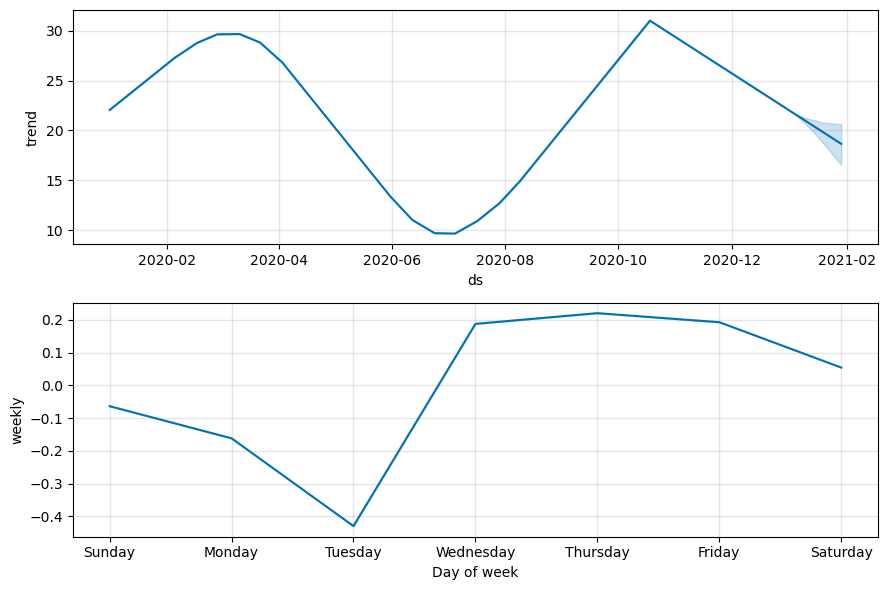

In [30]:
# Plot the forecast components (trend, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()
